Longwire antenna as used for a crystal radio <br>
<hr>
09-Jul-23      CBL       Original 
<hr>
references: 
Also look at my longwire ipynb <br>
http://electronbunker.ca/eb/AntennaMatch.html <br> 
These formulas, or equivalent versions of them can be found in Electrically Small Superdirective and Superconducting Antennas by R.C. Hansen; Wiley, 2006. <br> 
<hr>
Antenna Equivalent Circuit: <br> 
<img src="Pic/AntennaEquivCct.jpg">

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.constants   as konst

Solenoid calculation: <br>
$ L = {N^2 \mu_{0} A \over{l}}$ <br> 
if $R_2$ is wire radius and $R_1$ is the form radius then: <br> 
$A = \pi ({(R_1 + R_2)\over{2}})^2$

In [47]:
def SolenoidInductance(length, form_radius, wire_radius, NTurns):
    """
    @param length - length in m of coil (defines spacing)
    @param form_radius - in meters
    @param wire_radius - in meters
    @param NTurns - unitless
    
    reference: https://quickfield.com/advanced/long_solenoid_inductance.htm
    """
    Area = np.pi*np.power((2*form_radius+wire_radius)/2.0,2.0) 
    L = np.power(NTurns, 2.0) * konst.mu_0 * Area/length
    return L

In [48]:
def Freq(L,C):
    return 1.0/(2.0*np.pi*np.sqrt(L*C))

$ L_{a} = {\mu_{0} h_{a}\over{2\pi}} (ln({4h_{a}\over{d_{a}}})-0.75)$

In [49]:
def LW_Inductance(Height, Diameter):
    """
    From the webpage, the claim is that the inductance is given by the height above the ground and 
    wire diameter. value returned is in micro Henries
    @param Height   - height of wire above ground in meters
    @param Diameter - Diameter of wire used in meters
    """
    L = konst.mu_0 * Height/(2.0*konst.pi) * (np.log(4*Height/Diameter)-0.75)
    return L

$X_{a} = 60(1-ln({2h_{a}\over{d_{a}}}))cot({2\pi h_{a}\over{\lambda}})$

In [50]:
def LW_Reactance(Height, Diameter, Wavelength):
    """
    return reactance in ohms fro height above ground, wire diameter and wavelength
    @param Height   - height of wire above ground in meters
    @param Diameter - Diameter of wire used in meters
    @param Wavelength - of RF signal in meters
    """
    X = 60.0*(1.0 - np.log(2.0*Height/Diameter))/np.tan(2.0*konst.pi*Height/Wavelength)
    return X

Antenna loss resistance $r_a$ : <br> 
$r_{a} = {h_{a}\over{3 \pi d_{a} \sigma}} \sqrt{\pi f \mu_{0} \sigma}$ <br> 
<ul>
    <li> $r_{a}$ is the radiation loss of the antenna in ohms. </li>
    <li> $d_{a}$ is the diameter of the wire used in meters. </li>
    <li> $\sigma$ is the conductivity of the wire used in mho/meter, for copper this is 59600000 siemens/meter </li>
        <li> f is the Frequency in Hertz </li>
</ul>

In [51]:
def AntennaLoss(Height, Diameter, Sigma, Frequency):
    """
    return resistive loss in ohms fro height above ground, wire diameter and wavelength
    @param Height   - height of wire above ground in meters
    @param Diameter - Diameter of wire used in meters
    @param Sigma    - conductivity of wire in mho/meter
    @param Frequency - Frequency in Hz
    """
    r_a = Height/(3*konst.pi*Diameter*Sigma)*np.sqrt(konst.pi * Frequency * konst.mu_0 * Sigma)
    return r_a

$r_{R} = 40 ({\pi h_{a} \over {\lambda}})^2 $ <br> 
<ul> 
    <li> $r_{R}$ is the radiation resistance of the antenna. </li>
    <li> $h_{a}$ is the height of the antenna above the ground in meters. </li>
    <li> $\lambda$ is the wavelength of the desired frequency of interest. 
</ul>

In [52]:
def RadiationResistance(Height, Wavelength):
    """
    return radiation resistnace in ohms fro height above ground, wire diameter and wavelength
    @param Height   - height of wire above ground in meters
    @param Wavelength - Frequency in meters
    """
    r_R = 40.0*np.power(konst.pi * Height/Wavelength,2.0)
    return r_R


In [53]:
# 
# AWG wire sizes: https://pbxbook.com/other/awgsizes.html
# 22 gauge wire
awg_22 = 0.64516e-3        # diameter in meters
awg_12 = 0.0020525         # diameter in meters as per webpage example
Height = 3.0               # meters
F      = 1.0e6             # Hz
Lambda = konst.c/F         # meters
Sigma  = 59600000          # siemens/meter
r_G    = 0.5               # ohms, assumed
#
LW_L = LW_Inductance(Height, awg_12)
X_a  = LW_Reactance(Height, awg_12, Lambda)
r_a  = AntennaLoss(Height, awg_12, Sigma, F)
r_R  = RadiationResistance(Height, Lambda)
print("Frequency: ", F, " Hz and Wavelength: ", Lambda, " meters")
print("antenna loss, r_a: ", r_a, " ohms")
print("Radiation resistance, r_R: ", r_R, " ohms")
print("Reactance X_a: ", X_a, " ohms")
print("LW Inductance L_a: ", LW_L, " H")

Frequency:  1000000.0  Hz and Wavelength:  299.792458  meters
antenna loss, r_a:  0.039913857283411715  ohms
Radiation resistance, r_R:  0.0395330972043568  ohms
Reactance X_a:  -6652.452879389353  ohms
LW Inductance L_a:  4.754162022443465e-06  H


In [54]:
#combine X_a and L_a for total reactance. 
# calculate the inductave reactance. 
X_L = 2.0*konst.pi*LW_L
X_sum = X_a + X_L
R_sum = r_a + r_R + r_G
print("Total Antenna reactance: ", X_sum, " ohms")
print("And the total antenna response is: ", R_sum, " + ", X_sum,  "j ohms")

Total Antenna reactance:  -6652.452849518072  ohms
And the total antenna response is:  0.5794469544877685  +  -6652.452849518072 j ohms


In [55]:
# And what inductance will cancel this out? 
L_fix = -X_sum/(2*konst.pi*F)
print("Balance inductance: ", L_fix, " H")

Balance inductance:  0.0010587707546865657  H


Text(0, 0.5, 'Ohms')

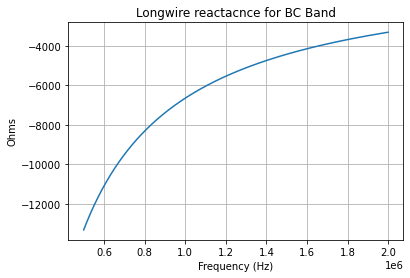

In [56]:
# Lets see how this behaves as a function of frequency
fsweep  = np.arange(500.0e3,2.0e6,1.0e3)
omega   = 2.0*np.pi*fsweep
LS      = konst.c/fsweep
Xsweep  = LW_Reactance(Height, awg_12, LS)
plt.plot(fsweep, Xsweep)
plt.grid()
plt.title("Longwire reactacnce for BC Band")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Ohms")


Text(0, 0.5, 'Henries')

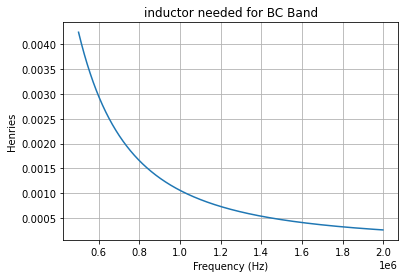

In [57]:
# and the sweep of corrective inductance:
Lsweep = -Xsweep/omega
plt.plot(fsweep, Lsweep)
plt.grid()
plt.title("inductor needed for BC Band")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Henries")


The variable inductor I have is 3.25" in diameter wound with AWG22 wire closely spaced. 
The overall length of the inductor is 6" and is air. Using https://crystalradio.net/professorcoyle/professorcoylecyl.shtml I get for the full 
length of the inductor: 3184.7 uH. So this should work fine. <br> 

If we assume that all of the reactance of the downstream system is dominated by the 
headphones. Lets have a look.

Text(0, 0.5, 'Ohms')

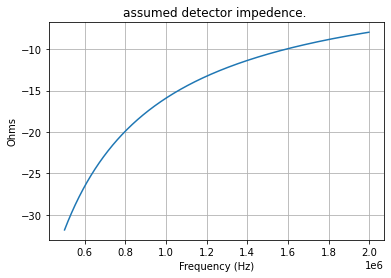

In [58]:
# I have a capacitor after the diode. 
C_det = 0.01e-6      # farads
X_det = -1.0/(omega*C_det)
plt.plot(fsweep, X_det)
plt.grid()
plt.title("assumed detector impedence. ")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Ohms")
# Woof, this is pretty low. 
# but assume my headphones are 2k ohms. 

Impedance of Parallel RLC circuit. https://www.omnicalculator.com/physics/rlc-impedance <br> 
$Z = {1.0\over{\sqrt{({1.0\over{R^2}}) + ({1.0\over{\omega L}}-\omega C)^2}}}$

In [59]:
def ParallelResonantImpedance(R,L,C,omega):
    """
    Return the magnitude of the impedance of a parallel tuned RLC circuit. 
    @param R - resistance in Ohms
    @param L - inductance in heneries
    @param C - capacitance in Farads
    @param omega - Frequency in radians/s
    Ref: https://www.omnicalculator.com/physics/rlc-impedance
    """
    Denom2 = 1.0/np.power(R,2.0) + np.power((1.0/(omega*L)-omega*C),2.0) 
    return 1.0/np.sqrt(Denom2)

In [60]:
# test
# Use the actual values. 
L = 262.0e-6       # Henries on the air core inductor, 2" coil form
C = 60.0e-12       # Farads
F = 1420.0e3       # Hz
R = 2000.0         # assumed on headphones
omega = 2*konst.pi*F
Z = ParallelResonantImpedance(R,L,C,omega)
print(" Expected impedence: ", Z, " ohms")

 Expected impedence:  1955.288072195972  ohms


This is really dominated by the impedence of the headphones! Looking at the plot above of the antenna reactance
this is like 5:2 ratio for 1420KHz, assume a 2K impedence as the dominant value and plot the ratio of the
antenna reactance to the input impedance. 

Text(0, 0.5, 'Ratio')

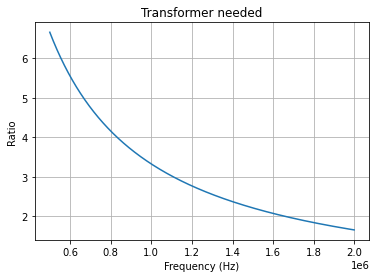

In [61]:
plt.plot(fsweep, -Xsweep/2000.0)
plt.grid()
plt.title("Transformer needed")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Ratio")
